In [1]:
#Part III: Random Forest

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns

In [2]:

df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df = df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1)

In [4]:
df = df.dropna(subset=['age', 'embarked', 'sex'])
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)



C:\Users\saksh\AppData\Local\Temp\ipykernel_14316\1938505878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_14316\1938505878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True


In [7]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [9]:
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Decision Tree")
print(f"Accuracy : {dt_acc:.4f}")
print(f"Precision: {dt_prec:.4f}")
print(f"Recall   : {dt_rec:.4f}")
print(f"F1-score : {dt_f1:.4f}")

Decision Tree
Accuracy : 0.7203
Precision: 0.8485
Recall   : 0.4444
F1-score : 0.5833


In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [11]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest")
print(f"Accuracy : {rf_acc:.4f}")
print(f"Precision: {rf_prec:.4f}")
print(f"Recall   : {rf_rec:.4f}")
print(f"F1-score : {rf_f1:.4f}")

Random Forest
Accuracy : 0.7832
Precision: 0.8200
Recall   : 0.6508
F1-score : 0.7257


C:\Users\saksh\AppData\Local\Temp\ipykernel_14316\1652394093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='mako')


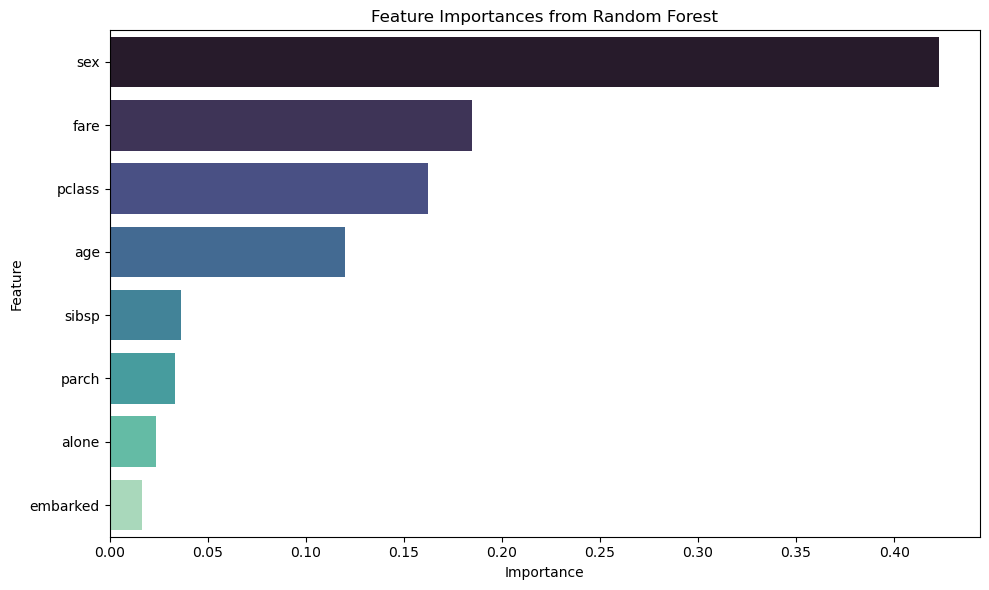

In [12]:
importances = rf.feature_importances_
feature_names = X.columns


feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='mako')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_14316\3813331651.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_feat_df, palette='Blues_d')


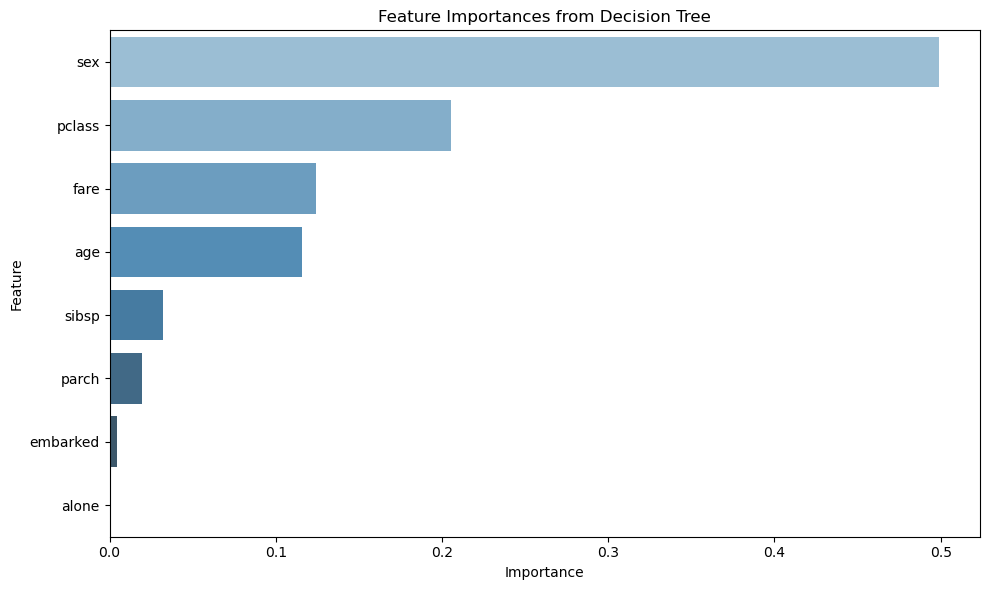

In [13]:
dt_importances = dt.feature_importances_
feature_names = X.columns

dt_feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importances})
dt_feat_df = dt_feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feat_df, palette='Blues_d')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()

In [14]:
# Task 9: Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
import time

In [15]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

c:\Users\saksh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [16]:
ada_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)

print("AdaBoost Classifier")
print(f"Accuracy : {ada_acc:.4f}")
print(f"F1-score : {ada_f1:.4f}")

AdaBoost Classifier
Accuracy : 0.8112
F1-score : 0.7805


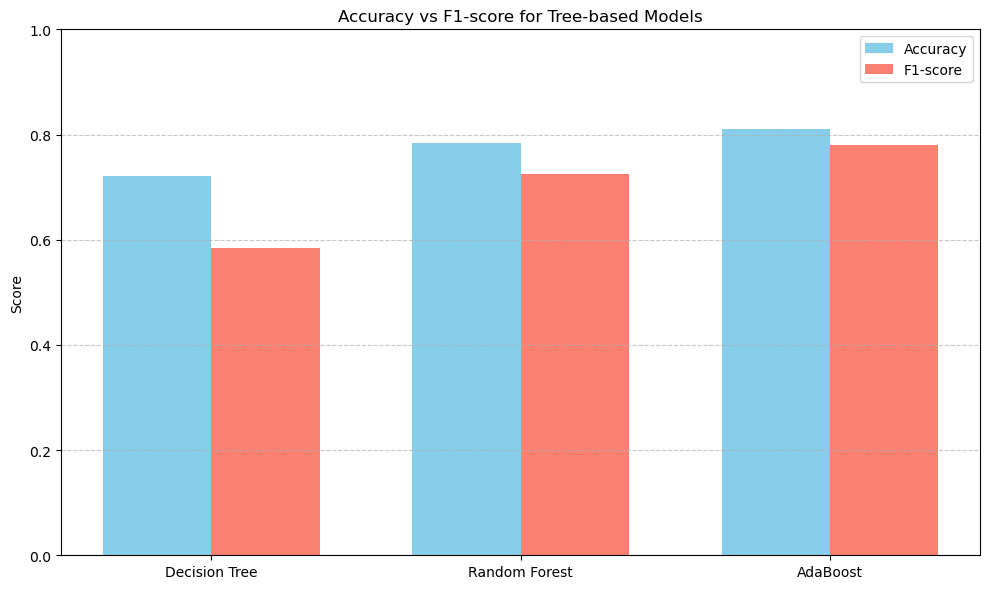

In [17]:
models = ['Decision Tree', 'Random Forest', 'AdaBoost']

accuracies = [dt_acc, rf_acc, ada_acc]
f1_scores = [dt_f1, rf_f1, ada_f1]

import numpy as np
x = np.arange(len(models))  
width = 0.35 

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_scores, width, label='F1-score', color='salmon')


plt.ylabel('Score')
plt.title('Accuracy vs F1-score for Tree-based Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
